In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:95%}</style>"))

# Setting up the library folder
from importlib import reload
import sys
sys.path.insert(0,'/home/jkumar16/MyModules')

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
df = pd.read_csv('/home/jkumar16/Training/ISLR/ISLR-python-master/Data/Auto.csv', na_values='?').dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:
t_prop = 0.5
p_order = np.arange(1,11)
r_state = np.arange(0,10)

X,Y = np.meshgrid(p_order, r_state, indexing='ij')
Z = np.zeros((p_order.size, r_state.size))

regr = LinearRegression()

In [55]:
# Generate 10 random splits of the dataset
for (i,j),v in np.ndenumerate(Z):
    poly = PolynomialFeatures(int(X[i,j]))
    X_poly = poly.fit_transform(df.horsepower.values.reshape(-1,1))
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, df.mpg.ravel(),test_size=t_prop, random_state=Y[i,j])
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    Z[i,j]= mean_squared_error(y_test, y_pred)

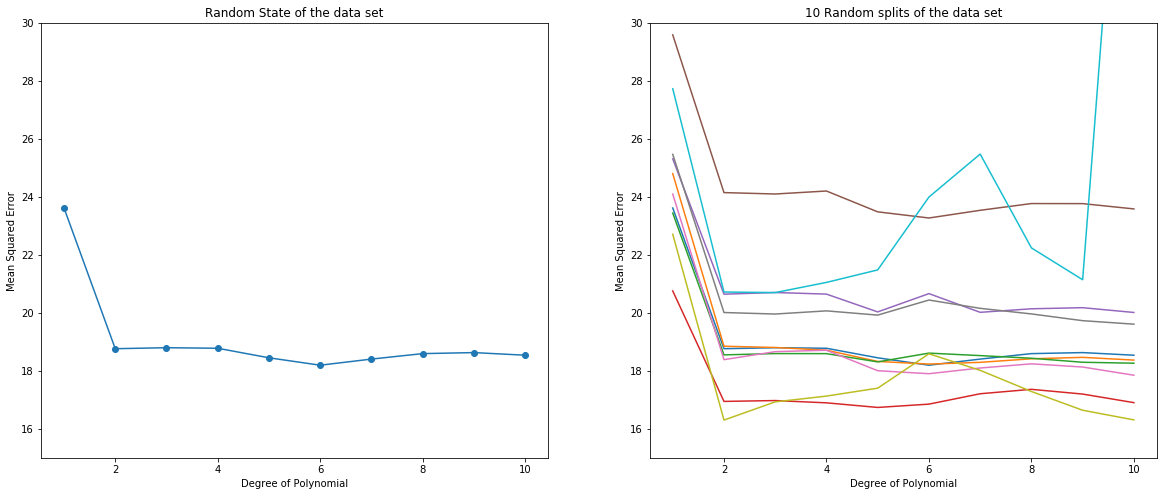

In [75]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
ax1.plot(X.T[0], Z.T[0], '-o')
ax1.set_title('Random State of the data set')

ax2.plot(X,Z)
ax2.set_title('10 Random splits of the data set')


for ax in fig.axes:
    ax.set_ylabel('Mean Squared Error')
    ax.set_xlabel('Degree of Polynomial')
    ax.set_ylim(15,30)

In [63]:
Z.T[0]

array([ 23.61661707,  18.76303135,  18.79694163,  18.77852784,
        18.44910467,  18.1936641 ,  18.40498443,  18.59339153,
        18.62883719,  18.53846981])

In [61]:
X.T[1]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

$c = \sqrt{a^2 + b^2}$

$e^{i\pi} + 1 = 0$

$P(x;\mu;\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} exp(-\frac{(x-\mu)^2}{2\sigma^2}),  x \epsilon [-\infty,\infty] $

$std = \sqrt{variance}$